In [1]:
# load the libraries
!ls

1_GBM_WSSM_Prediction.py  GBM_WSSM.py		    Mask_Labels.txt
GBM_WSSM.h5		  Mask_Integer_Encoding.py  sample_data


In [2]:
# import libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib
import matplotlib.pyplot as plt
import os, sys
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [3]:
!sudo pip3 install keras

In [4]:
import imageio.v2 as io
from PIL import Image

In [5]:
from tqdm import tqdm
from keras.layers import Input
from keras.models import Model
Image.MAX_IMAGE_PIXELS = 1000000000
from GBM_WSSM import GBM_WSSM_Model
from Mask_Integer_Encoding import RGBs_Finder, RGBs_to_Integers

In [7]:
image = io.imread("image4.jpg")
print(image.shape)

(1100, 1100, 3)


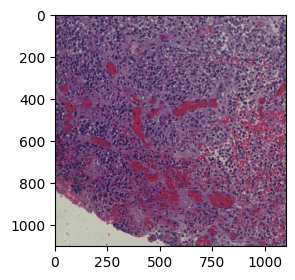

In [8]:
plt.figure(figsize=(3,3))
plt.imshow(image);

In [9]:
# this rescales the image to 512 x 512 px as model accepts same size
resized_image = cv2.resize(image,(512,512),cv2.INTER_LINEAR)
resized_image.shape

(512, 512, 3)

In [13]:
type(resized_image)

numpy.ndarray

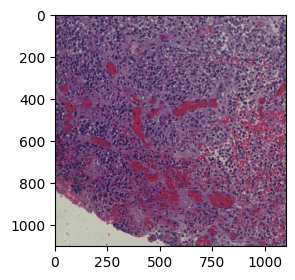

In [10]:
plt.figure(figsize=(3,3))
plt.imshow(image);

In [11]:
# Import all Arguments

GBM_Test_Images_Path = '/content/test_images/'
Predicted_Masks_Path = '/content/test_masks/'
GBM_WSSM_h5_path = '/content/GBM_WSSM.h5'
Labels_txt = '/content/Mask_Labels.txt'
Input_Shape = [512,512,3]
Class_No = 8

In [12]:
Image_Input =  Input(shape = [512,512,3])
Output = GBM_WSSM_Model(Class_No, Image_Input)
my_model = Model(inputs = Image_Input, outputs = Output)
my_model.load_weights(GBM_WSSM_h5_path)

In [24]:
Normalized_Image = resized_image / 255.
Mask_Predicted = my_model.predict(np.expand_dims(Normalized_Image, 0), 1)
Mask_Predicted = np.argmax(Mask_Predicted, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [25]:
Final_Mask = np.resize(Mask_Predicted, (resized_image.shape[0], resized_image.shape[1]))
Final_Mask.shape

(512, 512)

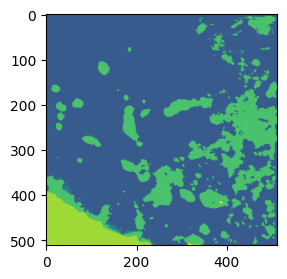

In [26]:
plt.figure(figsize=(3,3))
plt.imshow(Final_Mask);

In [ ]:
# based on the paper, the trained model classifies 8 zones
# 'Leading_Edge_LE_(Teal_or_Blue_Areas)' : 0
# 'Infiltrating_Tumor_IT_(Purple_Areas)': 1
# 'Cellular_Tumor_CT_(Green_Areas)': 2
# 'Perinecrotic_Zone_CTpnz_(Light_Blue_Areas)': 3
# 'Pseudopalisading_Cells_Around_Necrosis_CTpan_(Sea_Green_Areas)': 4
# 'Microvascular_Proliferation_CTmvp_(Red_Areas)': 5
# 'Necrosis_CTne_(Black_Areas)': 6
# 'Background_BC(White_Areas)': 7
# we need only the microvascular proliferation calculation


In [19]:
RGB_Values_List, Labels_List, RGB_and_Integers_Dictionary = RGBs_to_Integers(Labels_txt)
# understanding code
lst_rgb = [item for item in RGB_and_Integers_Dictionary.items()]
print(f"key is {lst_rgb[0][0]} and value is {lst_rgb[0][1]}")
Integer_to_RGBs = {val: key for (key, val) in RGB_and_Integers_Dictionary.items()}
Final_Mask = RGBs_Finder(Final_Mask, Integer_to_RGBs)

key is (33, 143, 166) and value is 0


In [27]:
revised_mask = np.where(Final_Mask == 5,1,0)

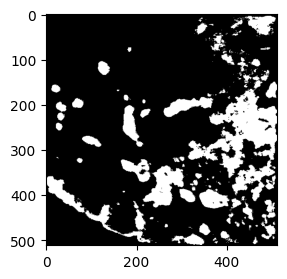

In [29]:
plt.figure(figsize=(3,3))
plt.imshow(revised_mask,cmap="gray");

In [21]:
# RGB_Values_List, Labels_List, RGB_and_Integers_Dictionary
RGB_and_Integers_Dictionary

{(33, 143, 166): 0,
 (210, 5, 208): 1,
 (5, 208, 4): 2,
 (37, 209, 247): 3,
 (6, 208, 170): 4,
 (255, 102, 0): 5,
 (5, 5, 5): 6,
 (255, 255, 255): 7}

In [22]:
Labels_List

['Leading_Edge_LE_(Teal_or_Blue_Areas)',
 'Infiltrating_Tumor_IT_(Purple_Areas)',
 'Cellular_Tumor_CT_(Green_Areas)',
 'Perinecrotic_Zone_CTpnz_(Light_Blue_Areas)',
 'Pseudopalisading_Cells_Around_Necrosis_CTpan_(Sea_Green_Areas)',
 'Microvascular_Proliferation_CTmvp_(Red_Areas)',
 'Necrosis_CTne_(Black_Areas)',
 'Background_BC(White_Areas)']

In [23]:
RGB_Values_List

[(33, 143, 166),
 (210, 5, 208),
 (5, 208, 4),
 (37, 209, 247),
 (6, 208, 170),
 (255, 102, 0),
 (5, 5, 5),
 (255, 255, 255)]